<a href="https://colab.research.google.com/github/KangHyeonGu1/-/blob/main/%ED%98%90%EC%98%A4%EC%B5%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns

In [2]:
data=pd.read_csv('혐오 데이터 분석한 버전 최.csv')
data.head

<bound method NDFrame.head of       Unnamed: 0       nsp       hom        cm   my
0              1  3.111111  2.090909  3.000000  2.8
1              2  2.555556  1.727273  3.714286  3.6
2              3  3.000000  2.090909  3.571429  1.8
3              4  3.111111  2.727273  4.000000  2.5
4              5  2.000000  2.181818  4.000000  3.1
...          ...       ...       ...       ...  ...
5519        5898  1.222222  1.000000  3.571429  1.8
5520        5907  1.000000  1.000000  5.000000  1.8
5521        5910  4.222222  3.090909  4.285714  1.8
5522        5912  2.333333  4.545455  4.000000  2.9
5523        5913  2.000000  2.000000  3.000000  1.6

[5524 rows x 5 columns]>

In [3]:
rm = ols(' nsp~ my', data=data).fit()
rm.summary()
rm.params

Intercept    2.072668
my           0.368737
dtype: float64

In [4]:
rm = ols(' hom~ my', data=data).fit()
rm.summary()
rm.params

Intercept    1.649604
my           0.321324
dtype: float64

In [5]:
rm = ols(' cm~ my', data=data).fit()
rm.summary()
rm.params

Intercept    3.189608
my           0.222510
dtype: float64

In [8]:
rm = ols(' cm~ my + nsp + hom ', data=data).fit()
rm.summary()
rm.params

Intercept    2.846755
my           0.159287
nsp          0.101752
hom          0.079993
dtype: float64

In [9]:
ones=np.ones(shape=(5524,3))
def dc(a,b):          
  c=a*b
  sum=c.sum()
  return sum

In [10]:
def freg(data):
  xx=data['my']
  xdf=pd.DataFrame({'xx':xx-0.5,'b':xx,'c':xx+0.5})
  x=xdf.to_numpy()
  mm1=data['nsp']
  m1df=pd.DataFrame({'a':mm1-0.5,'b':mm1,'c':mm1+0.5})
  m1=m1df.to_numpy()
  mm2=data['hom']
  m2df=pd.DataFrame({'a':mm2-0.5,'b':mm2,'c':mm2+0.5})
  m2=m2df.to_numpy()
  yy=data['cm']
  ydf=pd.DataFrame({'a':yy-0.5,'b':yy,'c':yy+0.5})
  y=ydf.to_numpy()
  xtx=np.zeros(shape=(2,2))
  xlist=[ones,x]
  for i in range(0,2):    
    for j in range(0,2):
      xtx[i,j]= dc(xlist[i],xlist[j])
  xtm1=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xtm1[i,j]= dc(xlist[i],m1)
  lxtx=np.linalg.inv(xtx)
  b1=lxtx@xtm1
  b1=np.around(b1, decimals=4)
  xtm2=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xtm2[i,j]= dc(xlist[i],m2)
  b2=lxtx@xtm2
  b2=np.around(b2, decimals=4)
  xtx3=np.zeros(shape=(4,4))
  xlist2=[ones,x,m1,m2]
  for i in range(0,4):    
    for j in range(0,4):
      xtx3[i,j]= dc(xlist2[i],xlist2[j])
  xty=np.zeros(shape=(4,1))
  for i in range(0,4):    
    for j in range(0,1):
      xty[i,j]= dc(xlist2[i],y)
  lxtx3=np.linalg.inv(xtx3)
  b3=lxtx3@xty
  b3=np.around(b3, decimals=4)
  return b1,b2,b3

In [12]:
xx=data['my']
xdf=pd.DataFrame({'xx':xx-0.5,'b':xx,'c':xx+0.5})
x=xdf.to_numpy()
mm1=data['nsp']
m1df=pd.DataFrame({'a':mm1-0.5,'b':mm1,'c':mm1+0.5})
m1=m1df.to_numpy()
mm2=data['hom']
m2df=pd.DataFrame({'a':mm2-0.5,'b':mm2,'c':mm2+0.5})
m2=m2df.to_numpy()
yy=data['cm']
ydf=pd.DataFrame({'a':yy-0.5,'b':yy,'c':yy+0.5})
y=ydf.to_numpy()

In [25]:
para=freg(data)
para
a1=para[0][1]
a2=para[1][1]
b1=para[2][2]
b2=para[2][3]

In [13]:
# sea와 seb
x_m=x.sum(axis=0)/5524
d2=(x-x_m)**2
sd=np.sqrt(d2.sum()/5523)
sd
sea=sd/np.sqrt(5524)

m_m1=m1.sum(axis=0)/5524
d2b1=(m1-m_m1)**2
sdb1=np.sqrt(d2b1.sum()/5523)
sdb1
seb1=sdb1/np.sqrt(5524)

m_m2=m2.sum(axis=0)/5524
d2b2=(m2-m_m2)**2
sdb2=np.sqrt(d2b2.sum()/5523)
sdb2
seb2=sdb2/np.sqrt(5524)
seb2
print(sea,seb1,seb2)

0.01726927241344491 0.024461121452798648 0.02234250027005983


In [14]:
# seab1  seab2
seab1=np.sqrt((para[0][1]**2*seb1**2)+ (para[2][2]**2*sea**2) + (sea**2*seb1**2) )
seab2=np.sqrt((para[1][1]**2*seb2**2)+ (para[2][3]**2*sea**2) + (sea**2*seb2**2) )
print(seab1,seab2)

[0.01282618] [0.01094351]


In [33]:
# a1의 95% 신뢰구간과 z값 검정
CI=[a1-1.96*sea,a1+1.96*sea]
a1z=a1/sea
a1p = 2 * (1 - stats.norm.cdf(np.abs(a1z)))
print(CI,a1p)

[array([0.48185223]), array([0.54954777])] [0.]


In [34]:
# a2의 95% 신뢰구간과 z값 검정
CI=[a2-1.96*sea,a2+1.96*sea]
a2z=a2/sea
a2p = 2 * (1 - stats.norm.cdf(np.abs(a2z)))
print(CI,a2p)

[array([0.44555223]), array([0.51324777])] [0.]


In [36]:
# b1의 95% 신뢰구간과 z값 검정
CI=[b1-1.96*seb1,b1+1.96*seb1]
b1z=b1/seb1
b1p = 2 * (1 - stats.norm.cdf(np.abs(b1z)))
print(CI,b1p)

[array([0.0841562]), array([0.1800438])] [6.64900484e-08]


In [35]:
# b2의 95% 신뢰구간과 z값 검정
CI=[b2-1.96*seb2,b2+1.96*seb2]
b2z=b2/seb2
b2p = 2 * (1 - stats.norm.cdf(np.abs(b2z)))
print(CI,b2p)

[array([0.0842087]), array([0.1717913])] [1.010293e-08]


In [15]:
# ab1의 95% 신뢰구간과 z값 검정
ab1=para[0][1]*para[2][2]
CI=[ab1-1.96*seab1,ab1+1.96*seab1]
z1=ab1/seab1
p1 = 2 * (1 - stats.norm.cdf(np.abs(z1)))
print(CI,p1)

[array([0.04298467]), array([0.09326327])] [1.08831858e-07]


In [16]:
# ab2의 95% 신뢰구간과 z값 검정
ab2=para[1][1]*para[2][3]
CI2=[ab2-1.96*seab2,ab2+1.96*seab2]
z2=ab2/seab2
p2 = 2 * (1 - stats.norm.cdf(np.abs(z2)))
print(CI2,p2)

[array([0.03991392]), array([0.08281248])] [2.05545383e-08]


In [17]:
#부트스트랩 표본
a1_boot=[None]*5000
a2_boot=[None]*5000
b1_boot=[None]*5000
b2_boot=[None]*5000
c_boot=[None]*5000
for i in range(0,5000):
  new_data=data.sample(n=5524,replace=True)
  parameters=freg(new_data)
  a1_boot[i]= parameters[0][1]
  a2_boot[i]= parameters[1][1]
  c_boot[i]= parameters[2][1]
  b1_boot[i]= parameters[2][2]
  b2_boot[i]= parameters[2][3]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


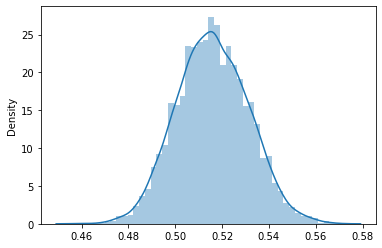

In [18]:
sns.distplot(a1_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


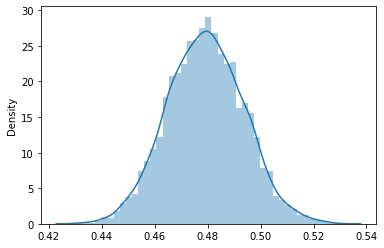

In [19]:
sns.distplot(a2_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


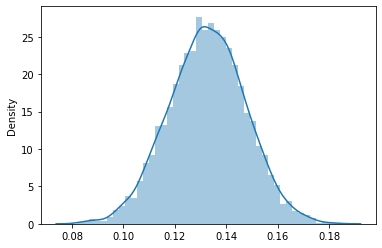

In [20]:
sns.distplot(b1_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


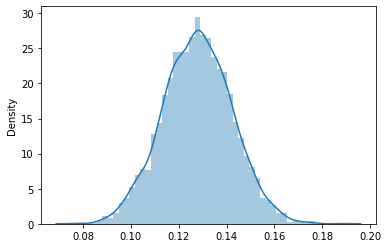

In [22]:
sns.distplot(b2_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


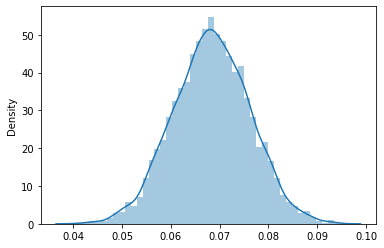

In [23]:
a1_ar=np.array(a1_boot)
b1_ar=np.array(b1_boot)
ab1_boot=a1_ar*b1_ar
sns.distplot(ab1_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


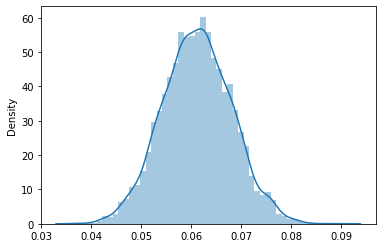

In [24]:
a2_ar=np.array(a2_boot)
b2_ar=np.array(b2_boot)
ab2_boot=a2_ar*b2_ar
sns.distplot(ab2_boot)

In [37]:
# 간접효과 a1에 대한 부트스트랩 신뢰구간
a1_boot.sort()
al=np.abs((a1_boot[124]+ a1_boot[125])/2)
au=np.abs((a1_boot[4873]+a1_boot[4874])/2)
acl=[a1- al*sea,a1 + au*sea]
acl

[array([0.50729332]), array([0.52512298])]

In [38]:
# 간접효과 a2에 대한 부트스트랩 신뢰구간
a2_boot.sort()
a2l=np.abs((a2_boot[124]+ a2_boot[125])/2)
a2u=np.abs((a2_boot[4873]+a2_boot[4874])/2)
a2cl=[a2- a2l*sea,a2 + a2u*sea]
a2cl

[array([0.47160983]), array([0.48816761])]

In [39]:
# 간접효과 b1에 대한 부트스트랩 신뢰구간
b1_boot.sort()
bl=np.abs((b1_boot[124]+ b1_boot[125])/2)
bu=np.abs((b1_boot[4873]+b1_boot[4874])/2)
bcl=[b1- bl*seb1,b1 + bu*seb1]
bcl

[array([0.1295854]), array([0.13604313])]

In [40]:
# 간접효과 b2에 대한 부트스트랩 신뢰구간
b2_boot.sort()
b2l=np.abs((b2_boot[124]+ b2_boot[125])/2)
b2u=np.abs((b2_boot[4873]+b2_boot[4874])/2)
b2cl=[b2- b2l*seb2,b2 + b2u*seb2]
b2cl

[array([0.12577916]), array([0.13149102])]

In [28]:
# 간접효과 ab1에 대한 부트스트랩 신뢰구간
ab1_boot.sort()
ab1= a1*b1
abl=np.abs((ab1_boot[124]+ ab1_boot[125])/2)
abu=np.abs((ab1_boot[4873]+ab1_boot[4874])/2)
abcl=[ab1- abl*seab1,ab1 + abu*seab1]
abcl

[array([0.06711112]), array([0.06905231])]

In [32]:
# 간접효과 ab2에 대한 부트스트랩 신뢰구간
ab2_boot.sort()
ab2= a2*b2
abl2=np.abs((ab2_boot[124]+ ab2_boot[125])/2)
abu2=np.abs((ab2_boot[4873]+ab2_boot[4874])/2)
abcl2=[ab2- abl2*seab2,ab2 + abu2*seab2]
abcl2

[array([0.06072142]), array([0.06206096])]